In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from utils import load, dump
from evaluate import eval, Evaluator
from os import getcwd
from tqdm import tqdm
import torch

In [3]:
root = f'{getcwd()}/..'

In [4]:
data = load(f'{root}/data/prd_backtick-se_cowait_annotated.json')

def evaluate(name):
    
    evaluator = Evaluator(f'{root}/../out/{name}')
    evaluator.plot_progress()
    
    y_true = []
    y_pred = []

    for pr in tqdm(data):
        title = pr['title']
        pcat = evaluator.predict(title)
        tcat = pr['category']

        y_true.append(tcat)
        y_pred.append(pcat)
    
    eval(y_true, y_pred)
    return evaluator

## Let's evaluate the transformer classifiers

### CodeBERT base

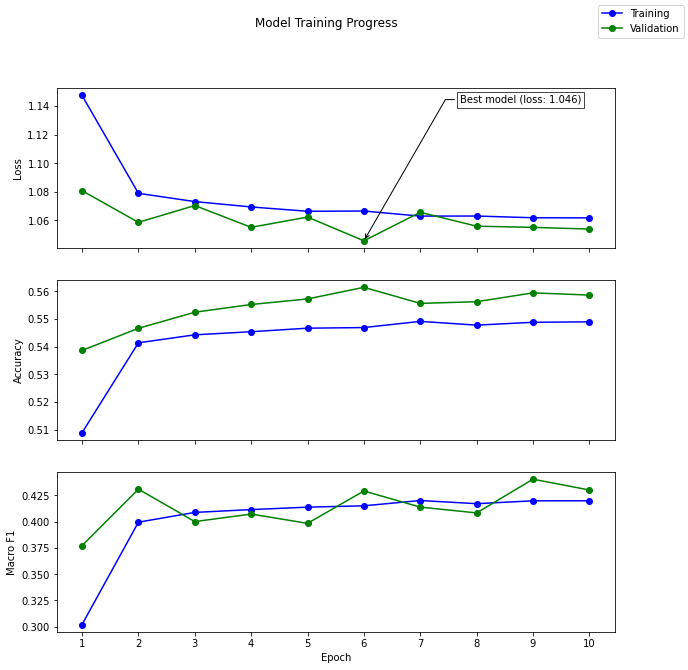

100%|██████████| 180/180 [00:11<00:00, 15.85it/s]

                precision    recall  f1-score   support

      fix-bugs       0.26      0.97      0.41        32
  new-features       0.40      0.04      0.07        49
 documentation       0.50      0.12      0.20         8
non-functional       0.80      0.47      0.59        91

      accuracy                           0.43       180
     macro avg       0.49      0.40      0.32       180
  weighted avg       0.58      0.43      0.40       180

[[31  1  0  0]
 [38  2  0  9]
 [ 4  1  1  2]
 [46  1  1 43]]


In [5]:
ev = evaluate('codebert-base_model_385k_unbalanced_1e-03_solid.pt')

### BERTOverflow base

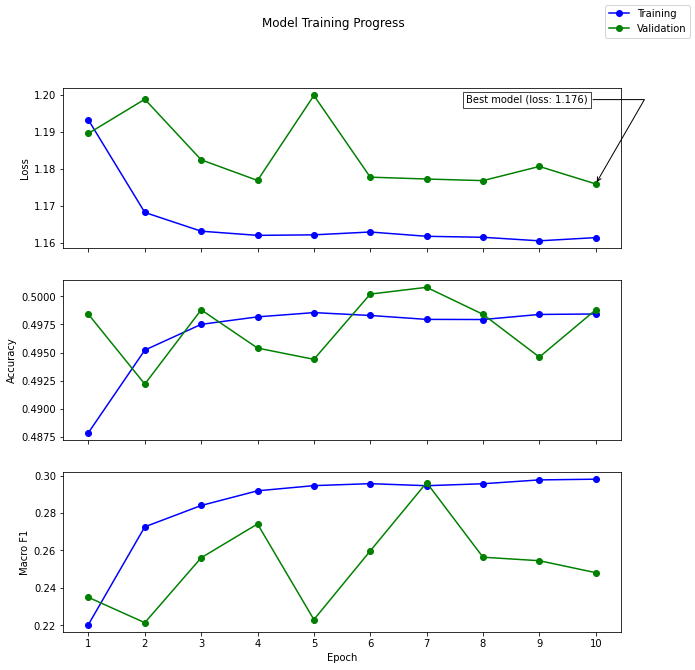

100%|██████████| 180/180 [00:08<00:00, 20.99it/s]
/home/shabo/anaconda3/envs/torch-cuda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shabo/anaconda3/envs/torch-cuda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

      fix-bugs       0.18      1.00      0.31        32
  new-features       0.00      0.00      0.00        49
 documentation       0.00      0.00      0.00         8
non-functional       0.00      0.00      0.00        91

      accuracy                           0.18       180
     macro avg       0.05      0.25      0.08       180
  weighted avg       0.03      0.18      0.05       180

[[32  0  0  0]
 [49  0  0  0]
 [ 8  0  0  0]
 [88  3  0  0]]


/home/shabo/anaconda3/envs/torch-cuda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
ev = evaluate('BERTOverflow_model_385k_unbalanced_1e-03_solid.pt')

### BERT

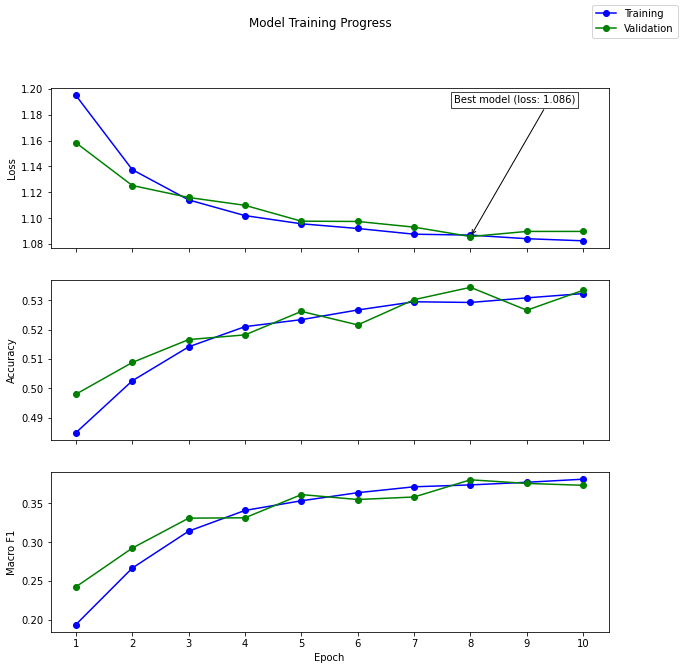

100%|██████████| 180/180 [00:09<00:00, 19.77it/s]


                precision    recall  f1-score   support

      fix-bugs       0.26      0.94      0.41        32
  new-features       0.78      0.37      0.50        49
 documentation       0.50      0.12      0.20         8
non-functional       0.64      0.27      0.38        91

      accuracy                           0.41       180
     macro avg       0.55      0.43      0.37       180
  weighted avg       0.61      0.41      0.41       180

[[30  0  0  2]
 [20 18  0 11]
 [ 6  0  1  1]
 [60  5  1 25]]


In [11]:
evaluate('bert-base-uncased_model_385k_unbalanced_1e-03_solid.pt')

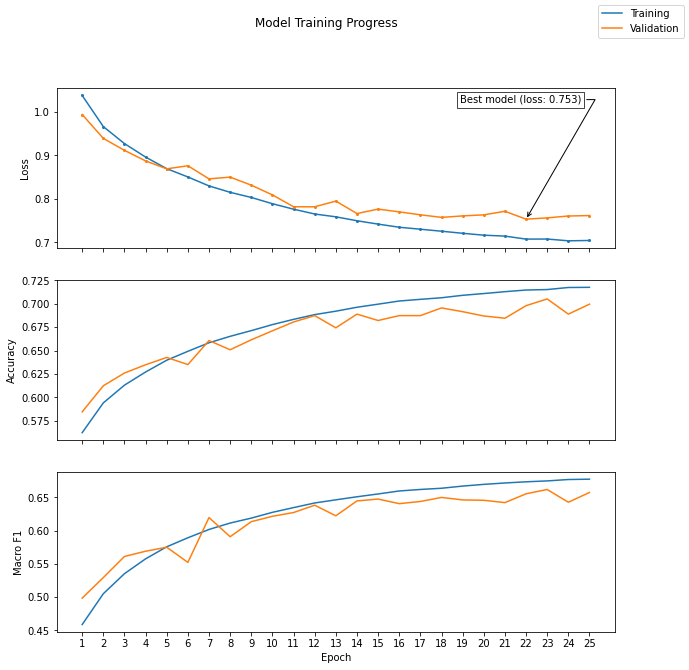

100%|██████████| 180/180 [00:04<00:00, 41.09it/s]

                precision    recall  f1-score   support

      fix-bugs       0.35      0.81      0.49        32
  new-features       0.57      0.35      0.43        49
 documentation       0.17      0.25      0.20         8
non-functional       0.75      0.53      0.62        91

      accuracy                           0.52       180
     macro avg       0.46      0.48      0.44       180
  weighted avg       0.60      0.52      0.53       180

[[26  3  1  2]
 [21 17  3  8]
 [ 0  0  2  6]
 [27 10  6 48]]


In [5]:
cbs_evaluator = evaluate('CodeBERTa-small-v1_model_385k_unbalanced_1e-03_solid.pt')

1. 0.47
2. 0.45
3. 0.48
6. 0.49
7. 0.50
8. 0.44
9. 0.47
10. 0.32

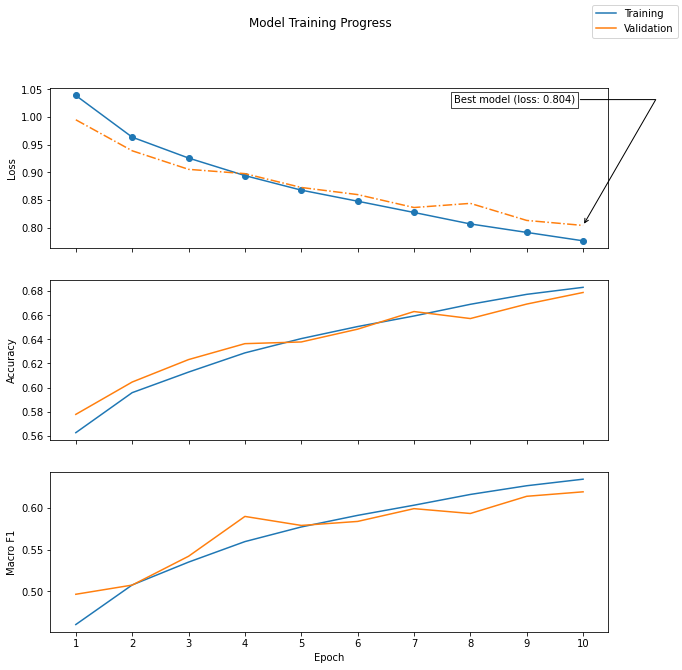

100%|██████████| 180/180 [00:04<00:00, 43.95it/s]

                precision    recall  f1-score   support

      fix-bugs       0.30      0.75      0.43        32
  new-features       0.57      0.16      0.25        49
 documentation       0.00      0.00      0.00         8
non-functional       0.62      0.57      0.59        91

      accuracy                           0.47       180
     macro avg       0.37      0.37      0.32       180
  weighted avg       0.52      0.47      0.45       180

[[24  0  2  6]
 [21  8  0 20]
 [ 1  1  0  6]
 [33  5  1 52]]


In [6]:
cbt_evaluator = evaluate('CodeBERTa-small-v1_model_385k_unbalanced_1e-03_thaw1.pt')

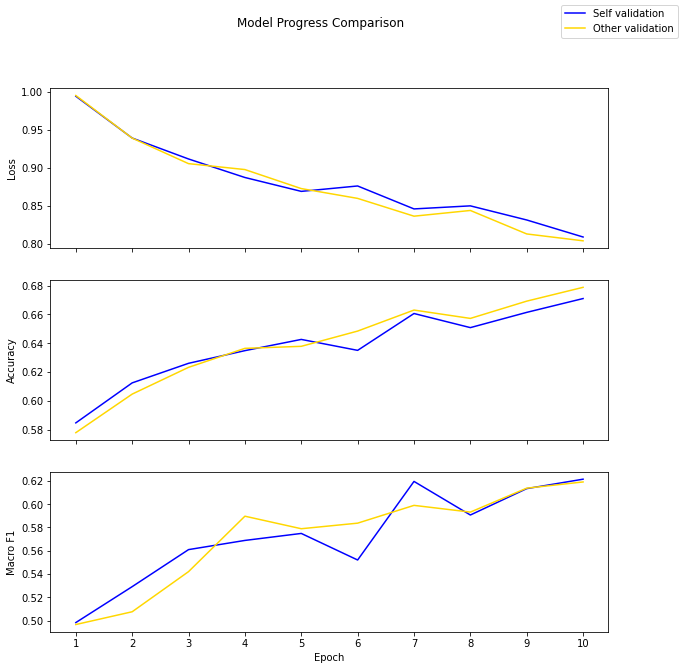

In [7]:
cbs_evaluator.compare(cbt_evaluator)